Resumen del Proceso

- **Preparar el entorno:** Importar las bibliotecas necesarias y crear la sesión Spark.
- **Leer y preparar los datos:** Leer el archivo CSV, renombrar las columnas y transformar las características en un solo vector.
- **Dividir los datos:** Separar los datos en conjuntos de entrenamiento y prueba.
- **Entrenar el modelo:** Crear y entrenar el modelo de regresión lineal.
- **Evaluar el modelo:** Realizar predicciones y evaluar el rendimiento del modelo.

Con estos pasos, podrás construir y evaluar un modelo de regresión lineal en Spark para predecir el valor medio de las casas (MEDV).

### Paso 1: Preparar el Entorno

En este paso, crearemos una sesión Spark y cargaremos los datos CSV en un DataFrame de Spark.

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Crear la sesión Spark
spark = SparkSession.builder \
    .appName("Ejemplo de regresión") \
    .master("local[*]") \
    .getOrCreate()

# Imprimir el objeto spark para asegurarnos de que la sesión se ha creado correctamente
print(spark)

24/06/24 13:18:26 WARN Utils: Your hostname, eurecat-vm resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
24/06/24 13:18:26 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/06/24 13:18:28 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### Paso 2: Leer y Preparar los Datos
Vamos a leer el archivo CSV, renombrar las columnas y convertir el DataFrame de Pandas en un DataFrame de Spark.

In [2]:
import pandas as pd 

# Nombres de las columnas
col_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

#Iimportamos el data set con la función pd.read_csv
df =  pd.read_csv("housing data.csv", sep=",", names=col_names, engine="python")

# Mostrar las primeras filas del DataFrame
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
# Convertir el DataFrame de Pandas en un DataFrame de Spark
sdf = spark.createDataFrame(df) 

# Mostrar las primeras filas del DataFrame
sdf.show(5)

+-------+----+-----+----+-----+-----+----+------+---+-----+-------+------+-----+----+
|   CRIM|  ZN|INDUS|CHAS|  NOX|   RM| AGE|   DIS|RAD|  TAX|PTRATIO|     B|LSTAT|MEDV|
+-------+----+-----+----+-----+-----+----+------+---+-----+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296.0|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242.0|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242.0|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222.0|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222.0|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+-----+-------+------+-----+----+
only showing top 5 rows



In [4]:
# Confirmar los tipos de las columnas
sdf.printSchema()

root
 |-- CRIM: double (nullable = true)
 |-- ZN: double (nullable = true)
 |-- INDUS: double (nullable = true)
 |-- CHAS: long (nullable = true)
 |-- NOX: double (nullable = true)
 |-- RM: double (nullable = true)
 |-- AGE: double (nullable = true)
 |-- DIS: double (nullable = true)
 |-- RAD: long (nullable = true)
 |-- TAX: double (nullable = true)
 |-- PTRATIO: double (nullable = true)
 |-- B: double (nullable = true)
 |-- LSTAT: double (nullable = true)
 |-- MEDV: double (nullable = true)



### Paso 3: Descripción Estadística Básica
Para obtener una descripción estadística básica del DataFrame, utilizamos el método describe().

In [5]:
# Descripción estadística básica
sdf.describe().show()

24/06/24 13:18:55 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+-----------------+------------------+------------------+-------------------+-------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+-----------------+
|summary|             CRIM|                ZN|             INDUS|               CHAS|                NOX|                RM|               AGE|               DIS|              RAD|               TAX|          PTRATIO|                 B|             LSTAT|             MEDV|
+-------+-----------------+------------------+------------------+-------------------+-------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+-----------------+
|  count|              506|               506|               506|                506|                506|               506|               506|               506|              50

### Paso 4: Preparar los Datos para la Regresión Lineal (Sin Estandarización)
En este paso, prepararemos los datos para la regresión lineal utilizando VectorAssembler.


In [6]:
from pyspark.ml.feature import VectorAssembler

# Crear un VectorAssembler para convertir las columnas de características en un solo vector de características
assembler = VectorAssembler(
    inputCols=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"],
    outputCol="features")

# Transformar el DataFrame para tener el vector de características
assembled_data = assembler.transform(sdf)

# Seleccionar solo las columnas necesarias (features y MEDV como label)
final_data = assembled_data.select("features", "MEDV")


# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
train_data, test_data = final_data.randomSplit([0.8, 0.2], seed=42)

# Mostrar la cantidad de registros en cada conjunto
print(f"Training Data Count: {train_data.count()}")
print(f"Test Data Count: {test_data.count()}")

Training Data Count: 407
Test Data Count: 99


### Paso 5: Entrenar el Modelo de Regresión Lineal
Ahora, crearemos y entrenaremos el modelo de regresión lineal.

In [7]:
from pyspark.ml.regression import LinearRegression

# Crear el modelo de regresión lineal
lr = LinearRegression(featuresCol="features", labelCol="MEDV", predictionCol="predicted_medv")

# Entrenar el modelo con los datos de entrenamiento
lr_model = lr.fit(train_data)


24/06/24 13:19:08 WARN Instrumentation: [5470576d] regParam is zero, which might cause numerical instability and overfitting.
24/06/24 13:19:09 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/06/24 13:19:10 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


### Paso 6: Evaluar el Modelo
Utilizaremos el conjunto de prueba para evaluar el modelo calculando el Error Cuadrático Medio (RMSE) y el coeficiente de determinación (R2).

In [8]:
from pyspark.ml.evaluation import RegressionEvaluator

predictions = lr_model.transform(test_data)
evaluator_rmse = RegressionEvaluator(labelCol="MEDV", predictionCol="predicted_medv", metricName="rmse")
evaluator_r2 = RegressionEvaluator(labelCol="MEDV", predictionCol="predicted_medv", metricName="r2")

rmse = evaluator_rmse.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data (sin estandarizar): {:.30f}".format(rmse))

r2 = evaluator_r2.evaluate(predictions)
print("R-squared (R2) on test data (sin estandarizar): {:.30f}".format(r2))



Root Mean Squared Error (RMSE) on test data (sin estandarizar): 5.161849160686287518728931900114
R-squared (R2) on test data (sin estandarizar): 0.619590150875880985026356029266


### Paso 7: Inspeccionar los Coeficientes del Modelo
Examinar los coeficientes e intercepto del modelo


In [9]:
coefficients = lr_model.coefficients
intercept = lr_model.intercept

print("Intercept: {:.3f}".format(intercept))
print("Coefficients: ", coefficients)


Intercept: 34.595
Coefficients:  [-0.1353573272109283,0.04068657864042695,0.021929811341771292,1.7437701174734874,-16.59412973184748,4.0662448602655,0.007628990433079871,-1.4029406589448272,0.3477199927952347,-0.012986392859136577,-1.0344284334929954,0.010917497006764637,-0.5361108580895457]


| Variable | Coeficiente | Interpretación                                                                                      |
|----------|-------------|-----------------------------------------------------------------------------------------------------|
| CRIM     | -0.135      | A medida que aumenta la tasa de criminalidad, el valor medio de las casas disminuye.                |
| RM       | 4.066       | Por cada habitación adicional, el valor medio de las casas aumenta significativamente.              |
| NOX      | -16.594     | Un aumento en la concentración de óxidos nítricos está asociado con una disminución considerable en el valor de las casas. |
| CHAS     | 1.744       | Las casas cercanas al río Charles tienen un valor más alto.                                         |




| Intercepto | Valor   | Interpretación                                                                                                                                                      |
|------------|---------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Intercepto | 34.595  | Cuando todas las variables independientes son cero, el valor medio estimado de las casas es 34.595. Esto puede interpretarse como el valor base desde el cual se ajustan los valores predichos según las características de las casas. |


### Paso 8: Analizar la Importancia de las Características
Para determinar qué características contribuyen más a las predicciones del modelo, analizamos los valores absolutos de los coeficientes.

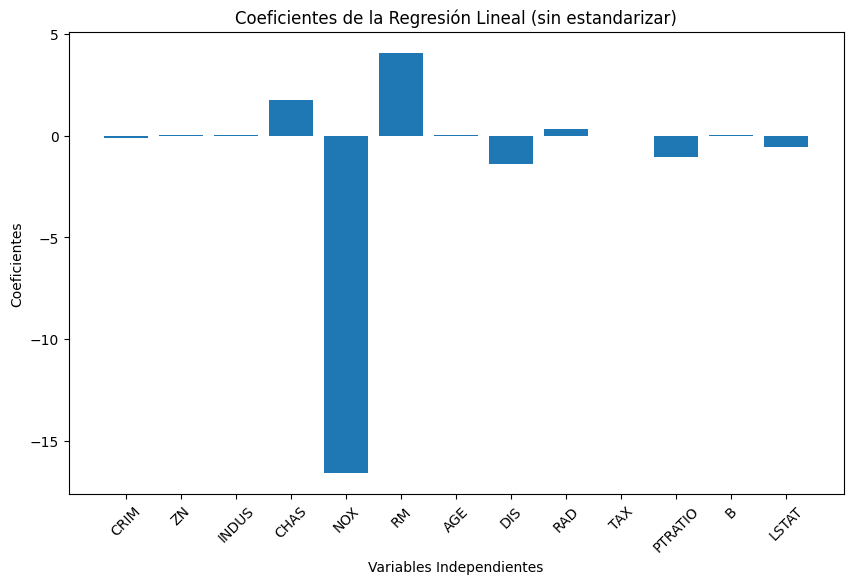

In [10]:
# Crear una lista con los nombres de las variables independientes
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]

# Visualizar los coeficientes
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(names, coefficients)
plt.xticks(rotation=45)
plt.xlabel("Variables Independientes")
plt.ylabel("Coeficientes")
plt.title("Coeficientes de la Regresión Lineal (sin estandarizar)")
plt.show()


| Variable | Descripción |
|----------|-------------|
| **CRIM** | La tasa de criminalidad tiene un coeficiente negativo de -0.135, lo que indica que a medida que la tasa de criminalidad aumenta, el valor medio de las casas disminuye. |
| **ZN, INDUS, TAX, B** | Estas variables tienen coeficientes cercanos a cero, lo que sugiere que tienen poco impacto en el valor medio de las casas. |
| **CHAS** | Las casas cercanas al río Charles tienen un coeficiente positivo de 1.744, indicando que estas casas tienden a tener un valor medio más alto. |
| **NOX** | La concentración de óxidos nítricos tiene un coeficiente negativo de -16.594, lo que muestra un fuerte efecto negativo sobre el valor de las casas. A medida que aumenta la concentración de NOX, el valor de las casas disminuye significativamente. |
| **RM** | El número de habitaciones promedio por casa tiene un coeficiente positivo de 4.066, sugiriendo que por cada habitación adicional, el valor medio de las casas aumenta considerablemente. |


De la gráfica de los coeficientes de la regresión lineal, podemos hacer las siguientes observaciones:

**CHAS y RM** tienen los mayores pesos positivos. Esto indica que las viviendas situadas cerca del río Charles ("CHAS") y aquellas con un mayor número de habitaciones promedio ("RM") tienden a tener valores medios más altos. Es razonable suponer que estas características hacen que las viviendas sean más atractivas y, por lo tanto, más valiosas.

**NOX** presenta el mayor coeficiente negativo, lo que sugiere un fuerte efecto adverso de la contaminación por óxidos nítricos en el valor de las viviendas. A medida que aumenta la concentración de NOX, el valor medio de las casas disminuye considerablemente. Esto es coherente con la expectativa de que áreas con alta contaminación del aire sean menos deseables para vivir.

**CRIM** también tiene un coeficiente negativo, aunque menor en magnitud comparado con NOX. Esto implica que áreas con mayores tasas de criminalidad tienden a tener valores de viviendas más bajos.

Variables como **ZN, INDUS, TAX, B** tienen coeficientes cercanos a cero, lo que sugiere que su impacto en el valor medio de las casas es mínimo en comparación con otras variables.
Finalmente, dibujaremos un heatmat para comprobar las correlaciones entre las variables independientes y la dependiente.

###  Paso 9: Dibujar un Heatmap de Correlaciones
Dibujaremos un heatmap para comprobar las correlaciones entre las variables independientes y la dependiente.

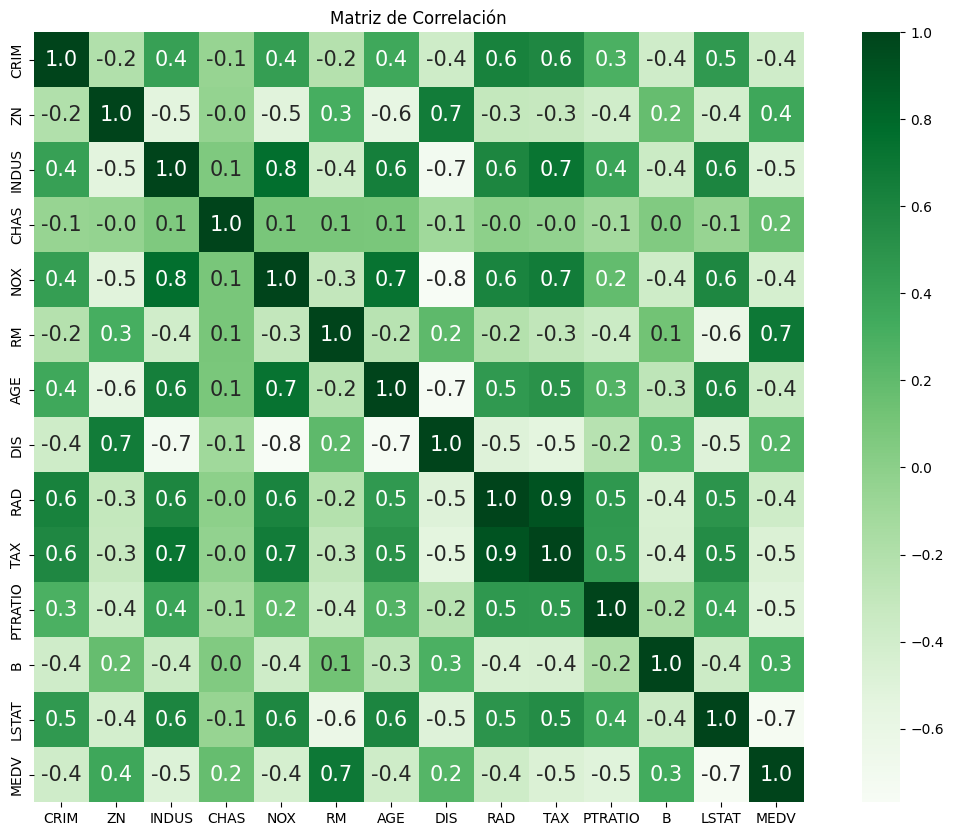

In [11]:
import seaborn as sns

# Convertir el DataFrame de Spark en un DataFrame de Pandas
df_pandas = sdf.toPandas()

# Calcular la matriz de correlación
corr = df_pandas.corr()

# Dibujar el heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
plt.title('Matriz de Correlación')
plt.show()


La matriz de correlación nos muestra cómo se relacionan las variables entre sí. Los valores van desde -1 hasta 1:

1 indica una correlación positiva perfecta: cuando una variable aumenta, la otra también lo hace.  
-1 indica una correlación negativa perfecta: cuando una variable aumenta, la otra disminuye.  
0 indica que no hay correlación entre las variables.  


| **Variable** | **Correlación con MEDV** | **Interpretación** |
|--------------|--------------------------|--------------------|
| CRIM         | -0.4                     | La tasa de criminalidad tiene un impacto negativo moderado en el valor medio de las casas. |
| ZN           | 0.4                      | La proporción de terrenos residenciales tiene una correlación positiva moderada con el valor de las casas. |
| INDUS        | -0.5                     | La proporción de terrenos industriales tiene un impacto negativo moderado en el valor de las casas. |
| CHAS         | 0.2                      | Las casas cercanas al río Charles tienden a tener un valor más alto. |
| NOX          | -0.4                     | La concentración de óxidos nítricos tiene un fuerte efecto negativo sobre el valor de las casas. |
| RM           | 0.7                      | El número de habitaciones por casa tiene un impacto positivo significativo en el valor medio de las casas. |
| AGE          | -0.4                     | La proporción de casas construidas antes de 1940 tiene una correlación negativa con el valor de las casas. |
| DIS          | 0.2                      | La distancia a los centros de empleo tiene un impacto positivo leve en el valor de las casas. |
| RAD          | -0.2                     | La accesibilidad a carreteras radiales tiene una correlación negativa leve con el valor de las casas. |
| TAX          | -0.5                     | La tasa de impuestos a la propiedad tiene un impacto negativo moderado en el valor de las casas. |
| PTRATIO      | -0.5                     | La proporción alumno-profesor tiene una correlación negativa moderada con el valor de las casas. |
| B            | 0.3                      | La proporción de personas de raza negra tiene una correlación positiva leve con el valor de las casas. |
| LSTAT        | -0.7                     | El porcentaje de población de bajo estatus socioeconómico tiene un fuerte impacto negativo en el valor de las casas. |
| MEDV         | 1.0                      | Valor medio de las casas. |



Si el rendimiento del modelo no cumple con sus expectativas, puede probar las siguientes estrategias para mejorarlo:

- **Selección de funciones:** elimine funciones menos importantes o agregue nuevas funciones según el conocimiento del dominio.
- **Escalado de funciones:** estandarice o normalice las funciones de entrada para garantizar que estén en la misma escala.
- **Ajuste de hiperparámetros:** ajuste los hiperparámetros del modelo, como la intensidad de la regularización o el recuento de iteraciones.

In [12]:
from pyspark.ml.feature import RobustScaler
from pyspark.ml import Pipeline

# Paso 10: Preprocesar y Volver a Entrenar con Datos Estandarizados
# Columnas numéricas y categóricas
numeric_features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
categorical_features = ['CHAS', 'RAD']

# Crear el VectorAssembler para las columnas numéricas
assembler = VectorAssembler(inputCols=numeric_features, outputCol="numeric_features")

# Aplicar el RobustScaler
scaler = RobustScaler(inputCol="numeric_features", outputCol="scaled_numeric_features")

# Crear el pipeline de preprocesamiento
pipeline = Pipeline(stages=[assembler, scaler])

# Ajustar y transformar los datos
pipeline_model = pipeline.fit(sdf)
scaled_data = pipeline_model.transform(sdf)

# Crear un nuevo VectorAssembler para las características escaladas y las características categóricas
assembler_final = VectorAssembler(
    inputCols=["scaled_numeric_features", "CHAS", "RAD"],
    outputCol="features")

# Transformar el DataFrame para tener el vector de características finales
final_data = assembler_final.transform(scaled_data)

# Seleccionar solo las columnas necesarias (features y MEDV como label)
final_data = final_data.select("features", "MEDV")

# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
train_data, test_data = final_data.randomSplit([0.8, 0.2], seed=42)

# Mostrar la cantidad de registros en cada conjunto
print(f"Training Data Count: {train_data.count()}")
print(f"Test Data Count: {test_data.count()}")

# Entrenar y Evaluar el Modelo de Regresión Lineal con Datos Estandarizados
# Crear el modelo de regresión lineal
lr = LinearRegression(featuresCol="features", labelCol="MEDV", predictionCol="predicted_medv")

# Entrenar el modelo con los datos de entrenamiento
lr_model = lr.fit(train_data)

# Realizar predicciones en el conjunto de prueba
predictions = lr_model.transform(test_data)

# Evaluar el modelo usando RMSE y R2
rmse = evaluator_rmse.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data (estandarizado): {:.30f}".format(rmse))

r2 = evaluator_r2.evaluate(predictions)
print("R-squared (R2) on test data (estandarizado): {:.30f}".format(r2))



Training Data Count: 407
Test Data Count: 99


24/06/24 13:19:24 WARN Instrumentation: [05cbeda5] regParam is zero, which might cause numerical instability and overfitting.


Root Mean Squared Error (RMSE) on test data (estandarizado): 5.161849160686235116202169592725
R-squared (R2) on test data (estandarizado): 0.619590150875888534542923480331


In [13]:
# Resultados sin estandarizar>
 
rmse = evaluator_rmse.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data (sin estandarizar): {:.30f}".format(rmse))

r2 = evaluator_r2.evaluate(predictions)
print("R-squared (R2) on test data (sin estandarizar): {:.30f}".format(r2))


Root Mean Squared Error (RMSE) on test data (sin estandarizar): 5.161849160686235116202169592725
R-squared (R2) on test data (sin estandarizar): 0.619590150875888534542923480331


In [14]:
# Cerrar la sesión de Spark
# Es una buena práctica cerrar la sesión de Spark al final del script para liberar recursos
spark.stop()

Referencias para profundizar en este campo:


[Pyspark Tutorial: Getting Started with Pyspark](https://www.datacamp.com/tutorial/pyspark-tutorial-getting-started-with-pyspark)

[Linear Regression in PySpark](https://medium.com/@roshmitadey/a-comprehensive-guide-to-linear-regression-in-pyspark-810fdaf5c17c)

[Regresión lineal de PySpark: cómo crear y evaluar modelos de regresión lineal utilizando PySpark MLlib](https://www.machinelearningplus.com/pyspark/pyspark-linear-regression/?utm_content=cmp-true)








